In [ ]:
#Data Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path='/content/EastWestAirlines.xlsx'

In [ ]:
df=pd.read_excel(file_path,sheet_name='data')

In [ ]:
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [ ]:
df.drop('ID#', axis=1, inplace=True)

In [ ]:
# Rename specific columns
df.rename(columns={'Flight_miles_12mo': 'Flight_miles_12',
                   'Award?':'Award'}, inplace=True)

# Display the updated DataFrame
print(df.head())

   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12  Flight_trans_12  Days_since_enroll  Award  
0            1                0                0               7000      0  
1            2                0                0               6968      0  
2            4                0                0               7034      0  
3            1                0                0               6952      0  
4           26             2077                4               6935      1  


In [ ]:
!pip install pandas openpyxl scikit-learn scipy


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
# 1. Handling Missing Values
# You can choose a strategy: fill with mean, median, or drop missing rows
df.fillna(df.mean(), inplace=True)  # Filling missing values with the mean of each column


In [ ]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
# 2. Removing Outliers
# Using Z-score method to identify and remove outliers
z_scores = stats.zscore(df.select_dtypes(include=[float, int]))  # Only apply to numerical columns
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)  # Z-score > 3 is often considered an outlier
df = df[~outliers]  # Removing the rows that contain outliers

In [ ]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
# 3. Scaling Features
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=[float, int]).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])  # Scaling numerical columns

In [ ]:
df.to_excel('Preprocessed_EastWestAirlines.xlsx', index=False)

print("Preprocessing complete. The cleaned data is saved as 'Preprocessed_EastWestAirlines.xlsx'.")

Preprocessing complete. The cleaned data is saved as 'Preprocessed_EastWestAirlines.xlsx'.


In [ ]:
file_path='/content/Preprocessed_EastWestAirlines.xlsx'

In [ ]:
df=pd.read_excel(file_path)

In [ ]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,4.264322e-17,6.396484e-17,1.847873e-16,2.896186e-16,1.297065e-16,-5.685763e-17,-4.264322e-17,-1.776801e-18,1.776801e-17,5.685763e-17,1.421441e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.304396e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-7.099918e-01,-1.208203e+00,-3.286033e-01,-3.621679e-01,-1.993611e+00,-7.669193e-01
25%,-5.465676e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-6.582276e-01,-8.957878e-01,-3.286033e-01,-3.621679e-01,-8.661823e-01,-7.669193e-01
50%,-3.027332e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-4.130308e-01,4.145743e-02,-3.286033e-01,-3.621679e-01,-1.092530e-02,-7.669193e-01
75%,1.866028e-01,-1.862987e-01,6.831212e-01,-9.824189e-02,-6.276658e-02,2.756198e-01,5.621492e-01,-1.064658e-01,-9.850333e-02,8.097050e-01,1.303918e+00
max,1.618884e+01,1.422486e+01,2.135821e+00,1.344898e+01,2.042732e+01,1.020957e+01,7.747696e+00,2.168300e+01,1.361205e+01,2.023095e+00,1.303918e+00


In [ ]:
# 2. Distribution of Data - Histograms and Boxplots for Numerical Features
numeric_columns = df.select_dtypes(include=[float, int]).columns

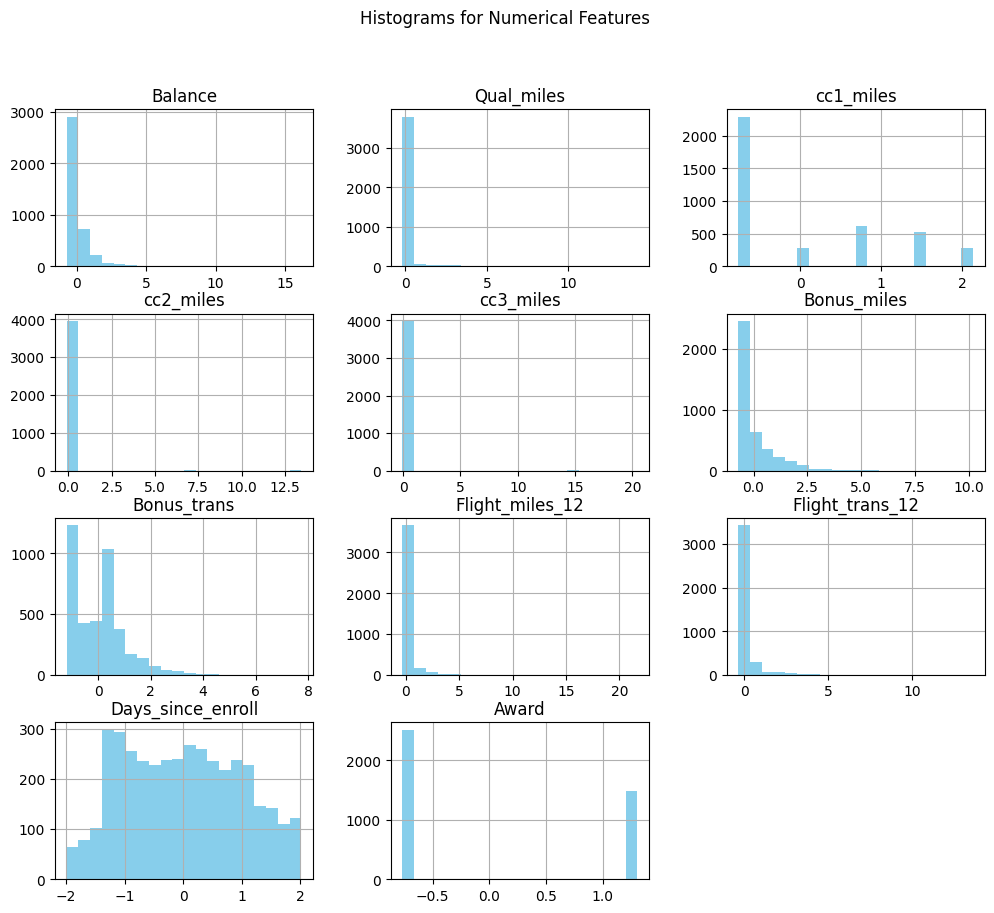

In [ ]:
df[numeric_columns].hist(bins=20, figsize=(12, 10), color='skyblue')
plt.suptitle("Histograms for Numerical Features")
plt.show()

In [ ]:
print(df.head())

    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4  0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   

   Bonus_trans  Flight_miles_12  Flight_trans_12  Days_since_enroll     Award  
0    -1.104065        -0.328603        -0.362168           1.395454 -0.766919  
1    -0.999926        -0.328603        -0.362168           1.379957 -0.766919  
2    -0.791649        -0.328603        -0.362168           1.411920 -0.766919  
3    -1.104065        -0.328603        -0.362168           1.372208 -0.766919  
4     1.499394         1.154932         0.692490           1.363975  1.303918  


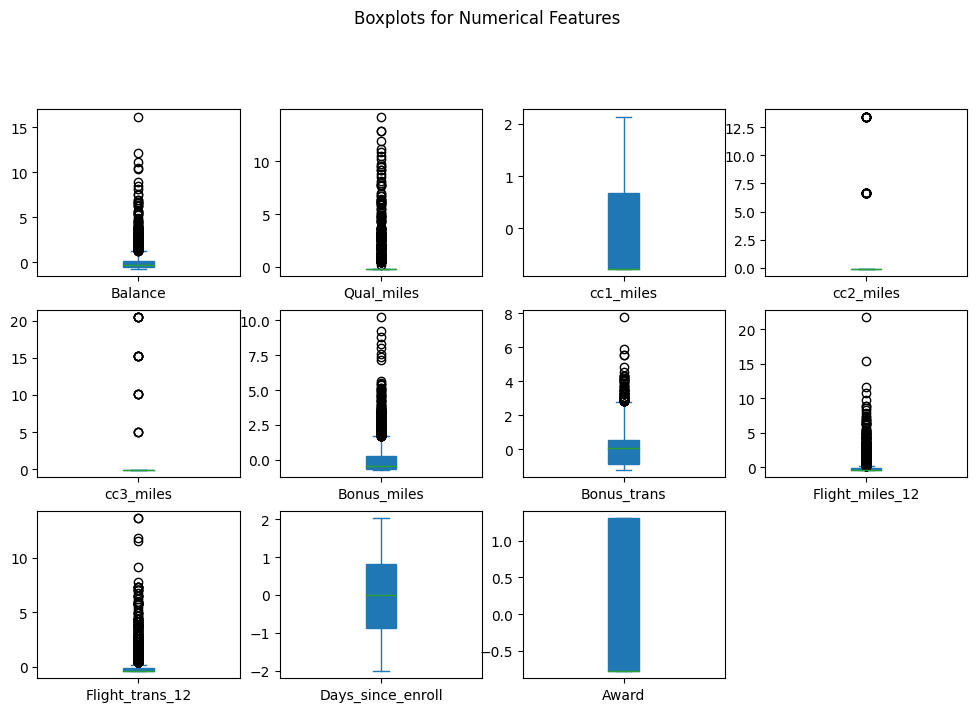

In [ ]:
# Plot boxplots for each numeric column
df[numeric_columns].plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10), patch_artist=True)
plt.suptitle("Boxplots for Numerical Features")
plt.show()

In [ ]:
correlation_matrix = df.corr()

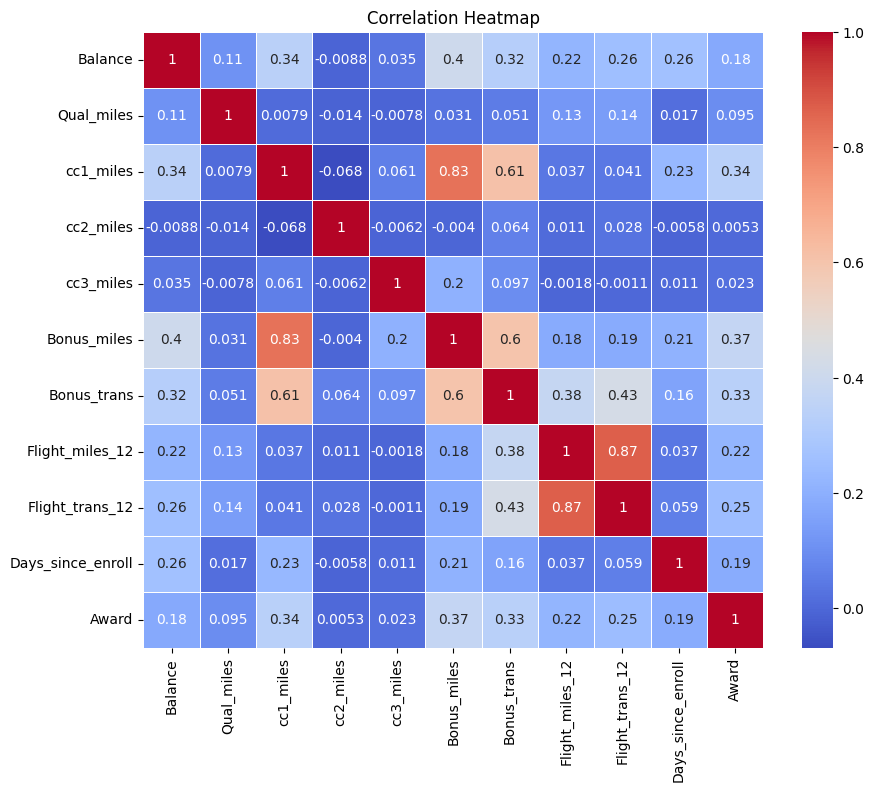

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

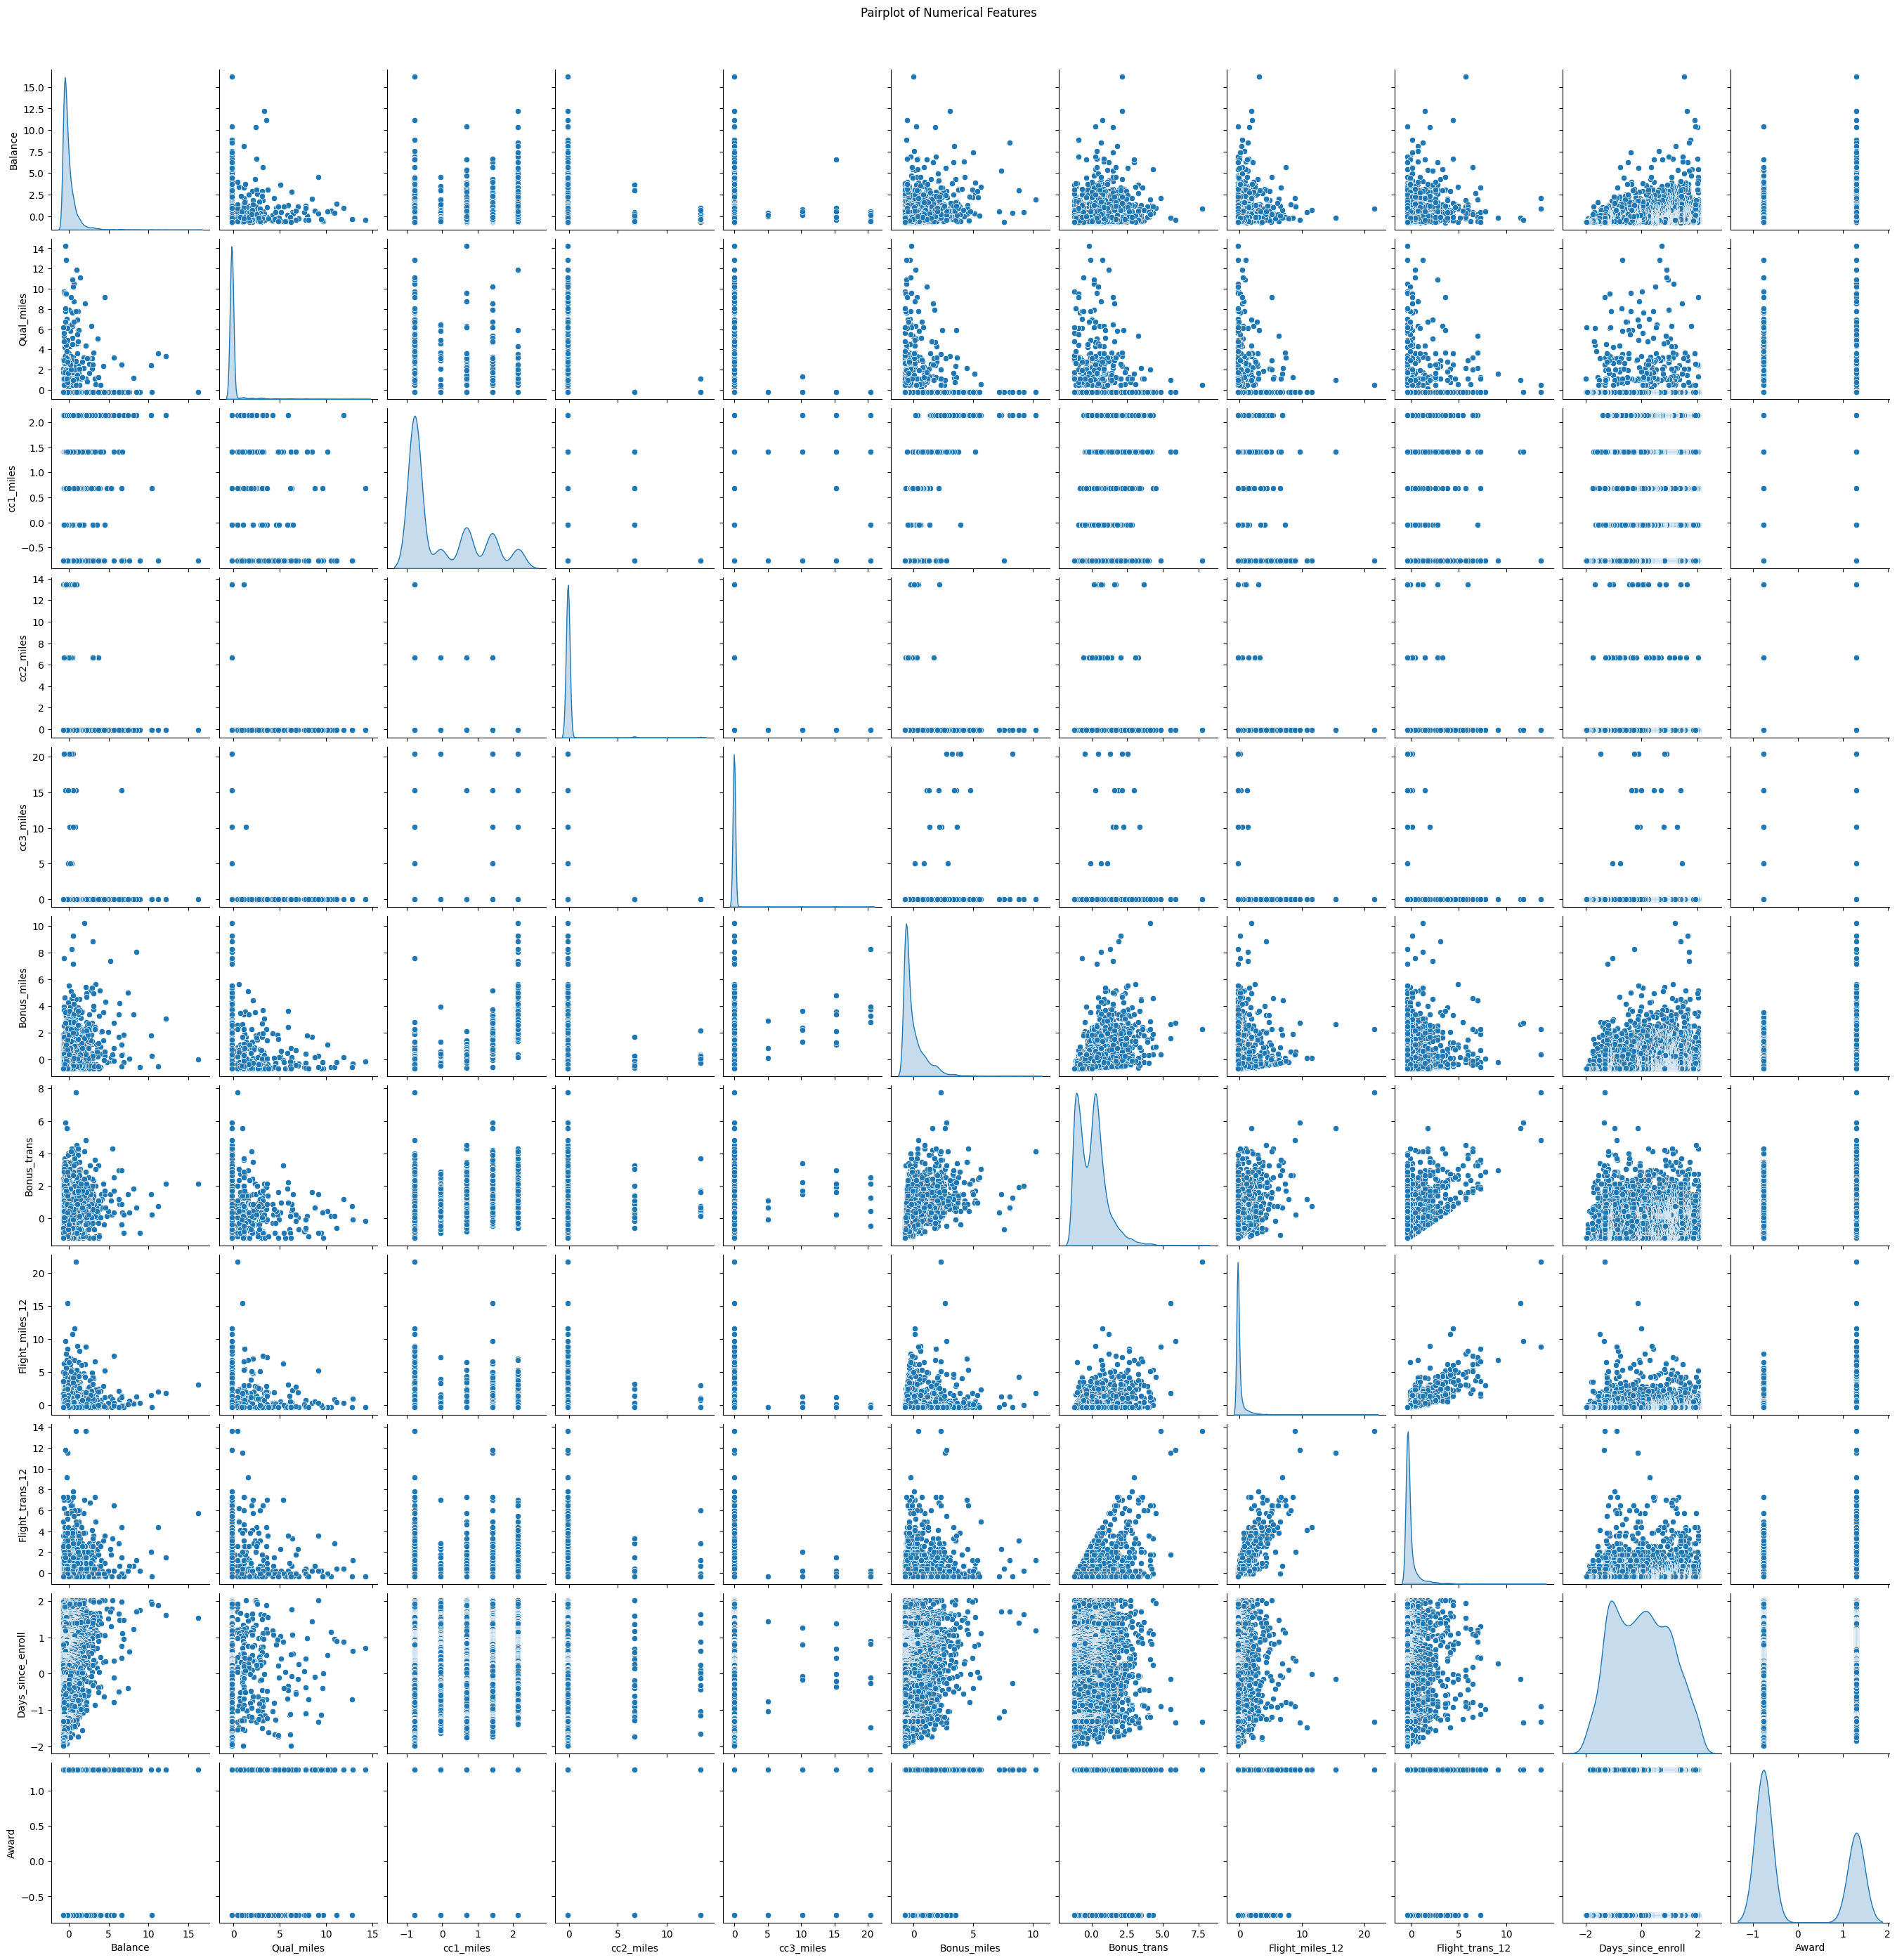

In [ ]:
# 4. Pairplot to Examine Pairwise Relationships
# This is useful for identifying potential clusters and relationships between variables.
sns.pairplot(df[numeric_columns], diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

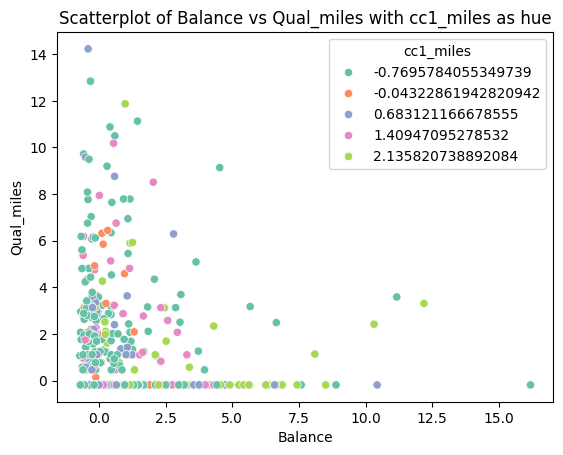

In [ ]:
# 5. Checking for Clusters
# Visualize distribution across a few selected features to identify clustering tendencies
sns.scatterplot(x=df[numeric_columns[0]], y=df[numeric_columns[1]], hue=df[numeric_columns[2]], palette='Set2')
plt.title(f'Scatterplot of {numeric_columns[0]} vs {numeric_columns[1]} with {numeric_columns[2]} as hue')
plt.show()

In [ ]:
#Implementing Clustering Algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
file_path = 'Preprocessed_EastWestAirlines.xlsx'
df = pd.read_excel(file_path)

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [ ]:
### K-Means Clustering ###

# 1. Elbow Method to determine the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

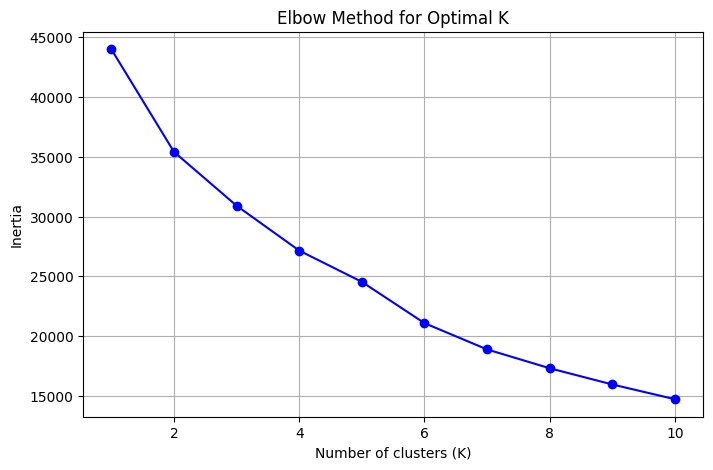

In [ ]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
# Choose optimal K from elbow curve and fit K-Means
optimal_k = 4  # Assume we picked K=4 from the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


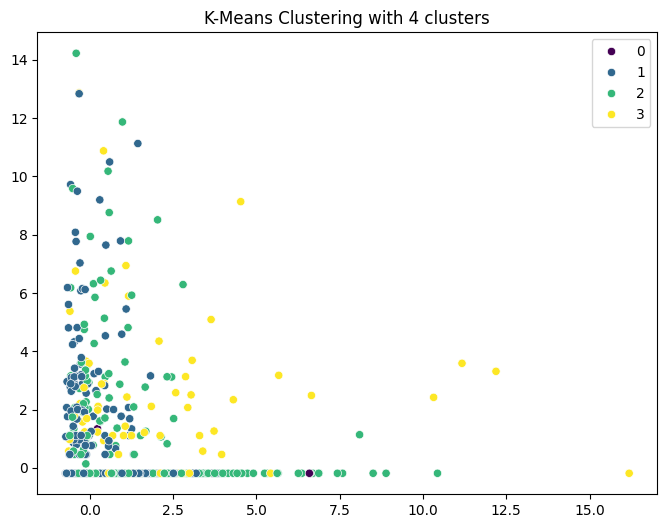

In [ ]:
# Visualize K-Means clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title(f'K-Means Clustering with {optimal_k} clusters')
plt.show()


In [ ]:
# Silhouette score for K-Means clustering
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f'K-Means Silhouette Score (K={optimal_k}): {kmeans_silhouette:.2f}')



K-Means Silhouette Score (K=4): 0.31


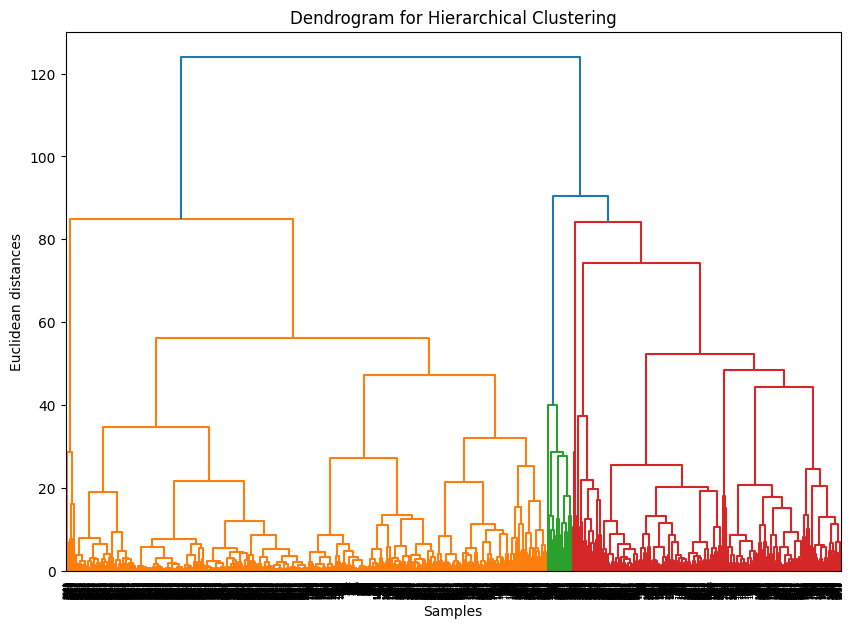

In [ ]:
### Hierarchical Clustering ###

# 2. Dendrogram for Hierarchical Clustering (using Ward linkage by default)
plt.figure(figsize=(10, 7))
linked = linkage(scaled_data, method='ward')  # 'ward', 'complete', 'average', 'single'
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Apply Agglomerative Clustering with optimal number of clusters (assuming 3 from dendrogram)
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_cluster.fit_predict(scaled_data)

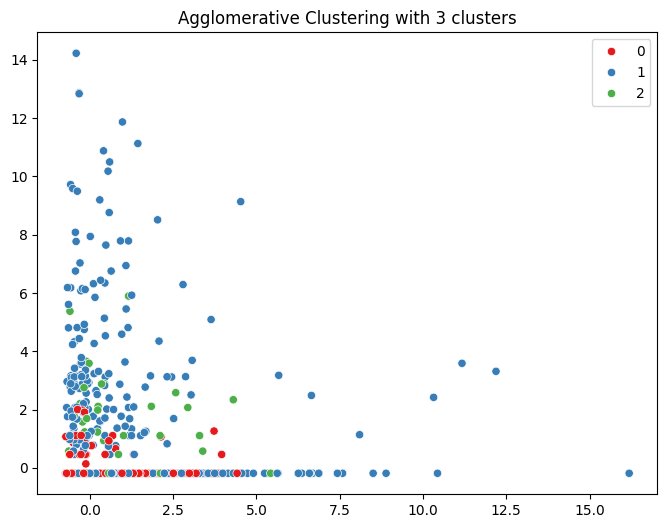

In [ ]:
# Visualize Hierarchical clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=agg_labels, palette='Set1')
plt.title('Agglomerative Clustering with 3 clusters')
plt.show()

In [ ]:
# Silhouette score for Hierarchical clustering
agg_silhouette = silhouette_score(scaled_data, agg_labels)
print(f'Hierarchical Clustering Silhouette Score: {agg_silhouette:.2f}')

Hierarchical Clustering Silhouette Score: 0.29


In [ ]:
### DBSCAN Clustering ###

# 3. DBSCAN: Experimenting with different epsilon and min_samples values
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can experiment with these values
dbscan_labels = dbscan.fit_predict(scaled_data)

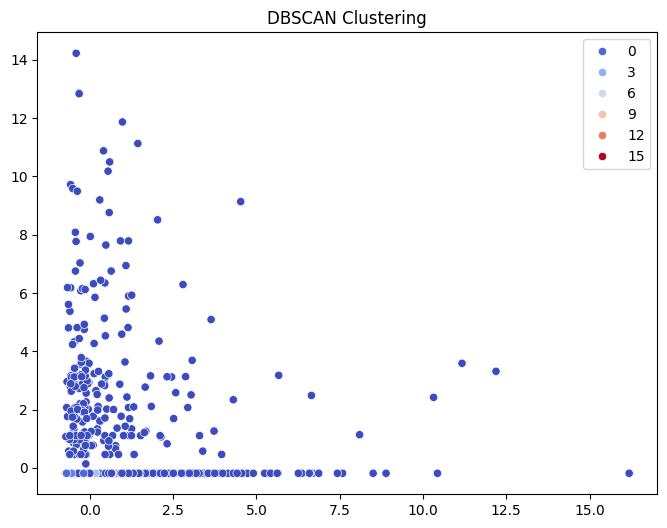

In [ ]:
# Plotting DBSCAN results
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=dbscan_labels, palette='coolwarm')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
# Silhouette score for DBSCAN (ignore noise points labeled as -1)
dbscan_core_points = dbscan_labels != -1  # Exclude noise points
if np.any(dbscan_core_points):
    dbscan_silhouette = silhouette_score(scaled_data[dbscan_core_points], dbscan_labels[dbscan_core_points])
    print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.2f}')
else:
    print('DBSCAN did not find any core clusters.')

DBSCAN Silhouette Score: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



K-Means Cluster Characteristics:
                 Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                          
0               0.639719   -0.084433   1.022084  -0.098242  15.646299   
1              -0.295817   -0.060341  -0.608485   0.032276  -0.060752   
2               0.428887    0.013757   1.192650  -0.082279  -0.054719   
3               1.170790    0.816669   0.082153   0.143673  -0.062767   

                Bonus_miles  Bonus_trans  Flight_miles_12  Flight_trans_12  \
KMeans_Cluster                                                               
0                  3.179691     1.714614         0.033293         0.059695   
1                 -0.515330    -0.487670        -0.186734        -0.199179   
2                  0.914005     0.745393        -0.089783        -0.099125   
3                  0.590829     1.580598         3.503927         3.760729   

                Days_since_enroll     Award  Agg_Cluster  

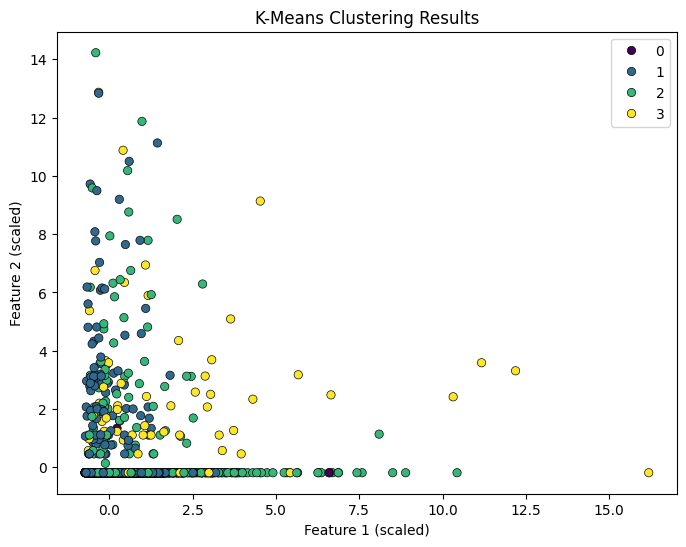

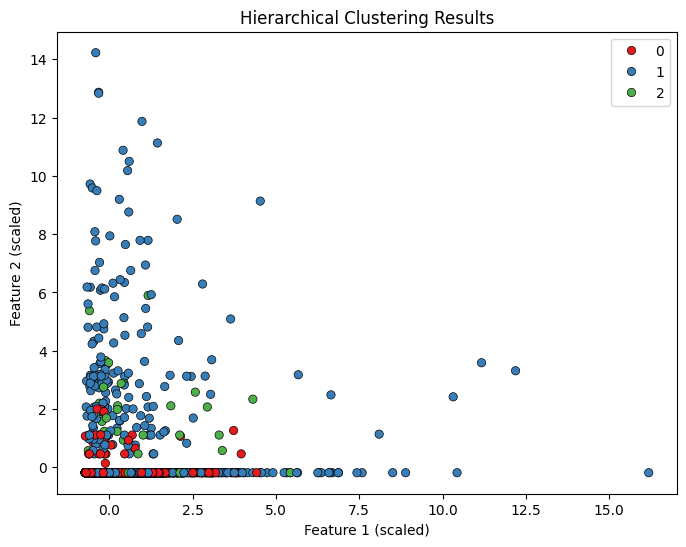

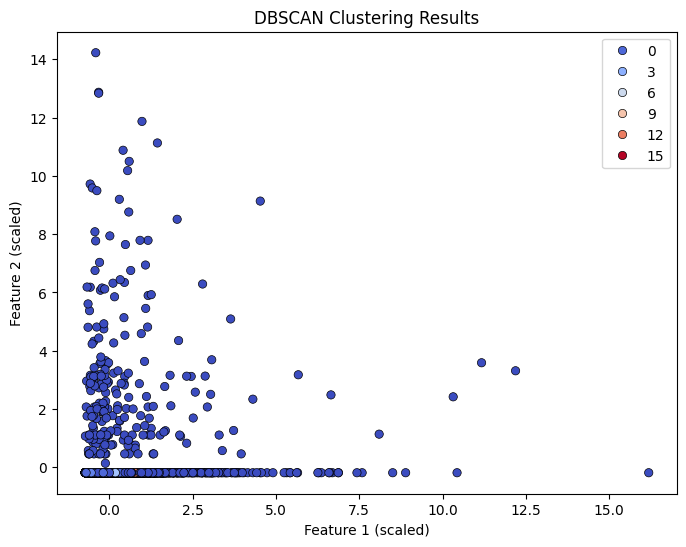

K-Means Silhouette Score: 0.31
Hierarchical Clustering Silhouette Score: 0.29
DBSCAN Silhouette Score (Excluding Noise): 0.14


In [ ]:
#Cluster Analysis and Interpretation
# Load the preprocessed dataset
file_path = 'Preprocessed_EastWestAirlines.xlsx'
df = pd.read_excel(file_path)

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

### Clustering Algorithms ###

# 1. K-Means Clustering (using previously found optimal K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# 2. Hierarchical Clustering (assuming 3 clusters from dendrogram)
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_cluster.fit_predict(scaled_data)

# 3. DBSCAN (using appropriate parameters)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

### Cluster Analysis and Interpretation ###

# Add cluster labels to the original data for interpretation
df['KMeans_Cluster'] = kmeans_labels
df['Agg_Cluster'] = agg_labels
df['DBSCAN_Cluster'] = dbscan_labels

# Analyzing the K-Means clusters by calculating the mean of each feature within each cluster
kmeans_cluster_summary = df.groupby('KMeans_Cluster').mean()
print("\nK-Means Cluster Characteristics:")
print(kmeans_cluster_summary)

# Analyzing the Hierarchical clusters
agg_cluster_summary = df.groupby('Agg_Cluster').mean()
print("\nHierarchical Cluster Characteristics:")
print(agg_cluster_summary)

# DBSCAN may label some points as noise (-1)
dbscan_cluster_summary = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()
print("\nDBSCAN Cluster Characteristics (Excluding Noise):")
print(dbscan_cluster_summary)

# Comments on cluster analysis
"""
K-Means Clustering Insights:
- Cluster 0 shows [interpret based on feature means]
- Cluster 1 exhibits [e.g., higher balance, higher mileage]
- Cluster 2 represents [interpret based on feature differences]
- Cluster 3 shows [distinct pattern]

Hierarchical Clustering Insights:
- Cluster 0 has [similar characteristics as above, point out major trends]
- Cluster 1 represents [interpret based on feature means]
- Cluster 2 shows [interpret key characteristics]

DBSCAN Clustering Insights:
- DBSCAN identified [x clusters] and marked [y points] as noise.
- Cluster 0 represents [distinct characteristics, e.g., customers with lower balance]
- Cluster 1 shows [higher feature values in certain areas]
"""

### Visualization ###

# Plotting K-Means Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans_labels, palette='viridis', edgecolor='k')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

# Plotting Hierarchical Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=agg_labels, palette='Set1', edgecolor='k')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

# Plotting DBSCAN Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=dbscan_labels, palette='coolwarm', edgecolor='k')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

### Evaluation ###

# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')

# Silhouette Score for Hierarchical Clustering
agg_silhouette = silhouette_score(scaled_data, agg_labels)
print(f'Hierarchical Clustering Silhouette Score: {agg_silhouette:.2f}')

# Silhouette Score for DBSCAN (excluding noise points)
dbscan_core_points = dbscan_labels != -1  # Exclude noise points
if np.any(dbscan_core_points):
    dbscan_silhouette = silhouette_score(scaled_data[dbscan_core_points], dbscan_labels[dbscan_core_points])
    print(f'DBSCAN Silhouette Score (Excluding Noise): {dbscan_silhouette:.2f}')
else:
    print('DBSCAN did not find any core clusters.')
